# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [1]:
!pip install smolagents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


Let's also login to the Hugging Face Hub to have access to the Inference API.

In [5]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [6]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 0.53 seconds| Input tokens: 2,077 | Output tokens: 70]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 2: Duration 0.13 seconds| Input tokens: 4,329 | Output tokens: 163]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(f"The highest-rated catering service in Gotham City is: {highest_rated_catering_service}")                 
  final_answer(highest_rated_catering_service)                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The highest-rated catering service in Gotham City is: Gotham Catering Co.

Out - Final answer: Gotham Catering Co.

[Step 3: Duration 0.38 seconds| Input tokens: 6,779 | Output tokens: 267]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [8]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme_idea = superhero_party_theme_generator(category='villain masquerade')                                      
  print(theme_idea)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 0.12 seconds| Input tokens: 2,113 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 0.12 seconds| Input tokens: 4,401 | Output tokens: 146]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [ ]:
party_theme_tool.push_to_hub("{your_username}/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an Realistic image of Indian holi party with colors, drinks and food place- hyderabad                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A vibrant Indian Holi party in the bustling city of Hyderabad, with people joyfully throwing colors,   
  enjoying traditional drinks like bhang and thandai, and savoring diverse food stalls. The scene is rich with     
  cultural elements, high-res, photorealistic."                                                                    
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x78997DAEE9D0>

[Step 1: Duration 10.05 seconds| Input tokens: 2,109 | Output tokens: 116]

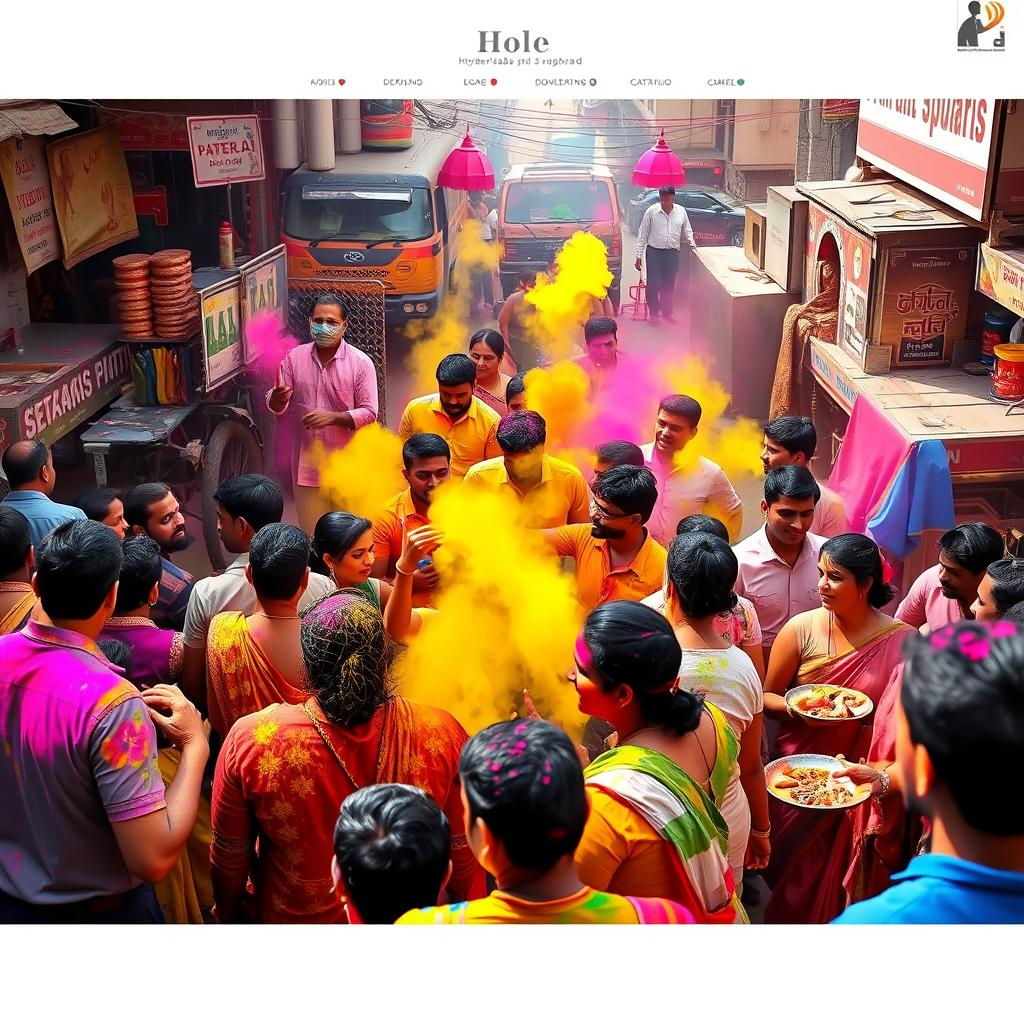

In [14]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an Realistic image of Indian holi party with colors, drinks and food place- hyderabad ")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [16]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 8.5 MB/s eta 0:00:00


In [19]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'Generate an Realistic image of Indian holi party with colors, drinks and food(paneer,dal kichdi and pakoda) place- hyderabad'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'Generate an Realistic image of Indian holi party with colors, drinks and food(paneer,dal       │
│ kichdi and pakoda) place- hyderabad'}.                                                                          │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "Generate a realistic image of an Indian Holi party in Hyderabad with vibrant colors,          
  featuring traditional drinks like thandai and lassi, and food items such as paneer, dal kichdi, and pakoras.     
  The scene should include lively decorations and people enthusiastically engaging in the traditional              
  festivities."                                                                                                    
                                                                                                                   
  # Printing the improved prompt for reference                                                                     
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Generate a realistic image of an Indian Holi party in Hyderabad with vibrant colors, featuring traditional drinks 
like thandai and lassi, and food items such as paneer, dal kichdi, and pakoras. The scene should include lively 
decorations and people enthusiastically engaging in the traditional festivities.

Out: None

[Step 1: Duration 6.62 seconds| Input tokens: 2,121 | Output tokens: 141]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Generating the image using the improved prompt                                                                 
  image = image_generator(prompt=improved_prompt)                                                                  
                                                                                                                   
  # Final answer with the generated image                                                                          
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/032ffc4ece187fa36f3310235a9c4e3da8493d69e74e6a2820dad79c80e5f89a/image.webp

[Step 2: Duration 10.49 seconds| Input tokens: 4,591 | Output tokens: 211]

'/tmp/gradio/032ffc4ece187fa36f3310235a9c4e3da8493d69e74e6a2820dad79c80e5f89a/image.webp'

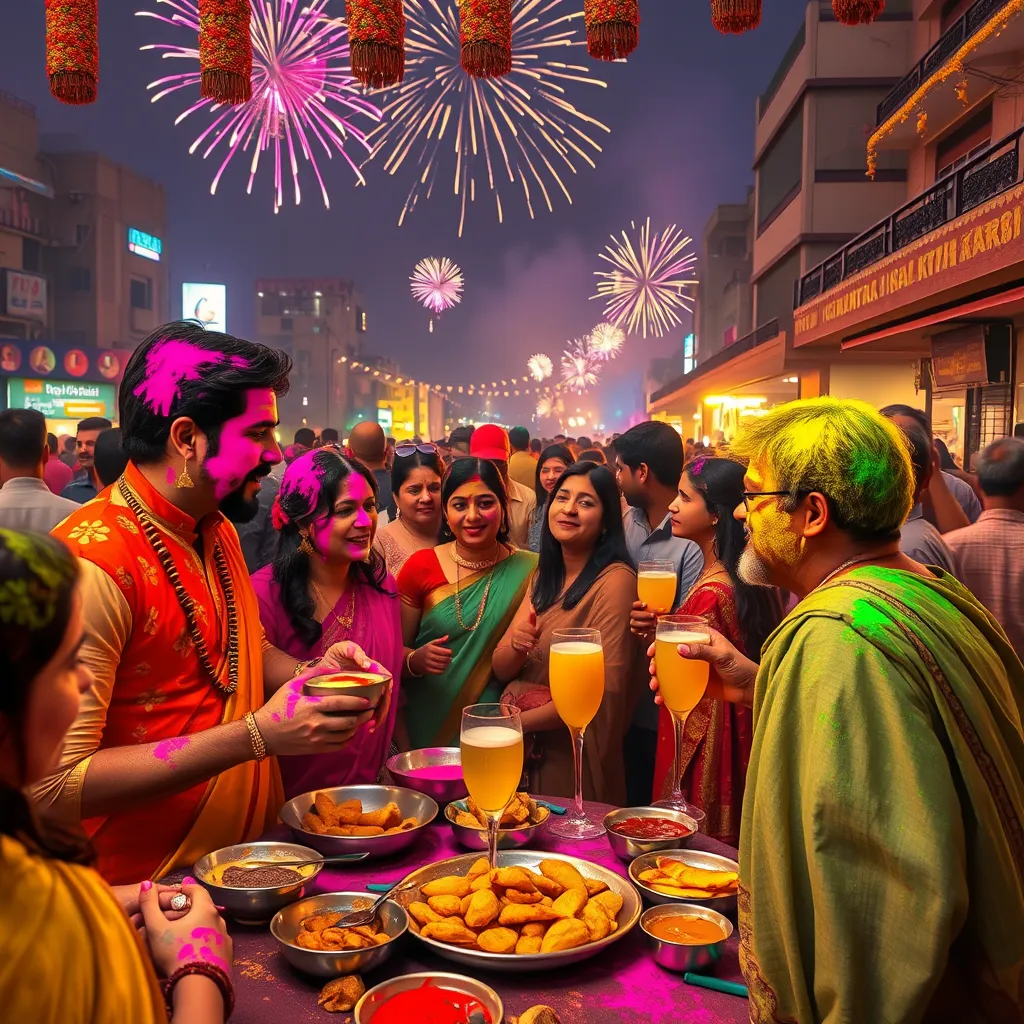

In [18]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/d89a9a396441f10b293884270e8c74e8de77461042f967f1939e0c7f39463765/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [ ]:
!pip install langchain-community google-search-results

In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="virtual event ideas for superhero-themed events, including live performances and interactive        
  experiences")                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: ['From theme days to care packages to costume contests, here is a list of fun ways to celebrate spirit weeks 
in remote offices.', 'Our virtual superhero happy hour event includes fun activities and a virtual field trip to 
iconic superhero filming sites. Your team will learn ...', 'Create your own music festival experience by watching 
videos and recorded shows together, or make plans to attend a live online show together.', "We'll explore unique 
and engaging event ideas for both in-person and virtual gatherings to ensure that your event leaves a lasting 
impression on your guests.", 'Teams get to design their own superhero characters and comics, then assemble Green 
Machine bikes and teddy bears for deserving kids.', 'Meet your favorite Superhero right from your own home! 15 
minutes includes personalized chat time, brief "Superhero Training," and singing "Happy Birthday" (if ...', 
'Superhero Theme. Everyone can dress up as their favorite superheroes or create their own superheroes for a fun and
imaginative virtual costume ...', 'These 10 best virtual networking event ideas will take your virtual gatherings 
from bland to brilliant.', 'The best unusual team building activities for virtual meetings are games that build 
critical team skills like communication, collaboration, and creativity.', 'Find virtual office party ideas your 
team will love! Perfect for virtual meetings, awards ceremonies, holiday parties, and more.']

[Step 0: Duration 11.74 seconds| Input tokens: 2,082 | Output tokens: 61]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="superhero-themed live performances and interactive experiences for events")                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: ["Allow your guests to live out their childhood fantasy of being a superhero from a comic book with O'Brien 
Productions Superheroes Party.", 'When in doubt, throw a superhero party - this party theme will save the day! Be 
the hero of your own story, and create the ultimate superhero themed event.', 'Engage in action-packed activities, 
thrilling photo ops, and dynamic performances that bring superhero stories to life. Versatile Appearances. Perfect 
for ...', 'OVERVIEW. Join Spider-Man, Hulk, Captain America, Iron Man and the Avengers against the forces of evil. 
Climb vertical treadmills with Spiderman.', 'We offer several superhero party characters & affordable party 
packages.Black Panther,Superman,Wonder Woman,Iron Man party.', 'Superhero Encounter brings your favourite comic 
book characters to life with action-packed performances and interactive experiences. Perfect for parties, ...', 'We
designed & produced multiple themed interactive activations & media zones for this Superhero themed event for a 
biotech company. Our Experiential ...', 'Unleash the hero within! Strike a legendary pose during scheduled photo 
moments with such Super Heroes as: Spider-Man; Thor; Loki; Black Panther; Shuri from ...', 'What is included in a 
superhero party? · Fun games and prizes · Epic superhero story time · An extra special surprise for the VIP 
birthday boy/girl.', 'Live out your fictional fantasies at your very own Superhero themed event! Our props, 
performers, and decor will save the day!']

[Step 1: Duration 7.26 seconds| Input tokens: 4,574 | Output tokens: 119]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = [                                                                                   
      {                                                                                                            
          "name": "O'Brien Productions Superheroes Party",                                                         
          "description": "Engages guests with dynamic performances and action-packed activities that bring         
  superhero stories to life."                                                                                      
      },                                                                                                           
      {                                                                                                            
          "name": "Superhero Encounter",                                                                           
          "description": "Brings favorite comic book characters to life with action-packed performances and        
  interactive experiences, perfect for parties."                                                                   
      },                                                                                                           
      {                                                                                                            
          "name": "Biotech Company Event",                                                                         
          "description": "Included themed interactive activations and media zones providing a unique               
  superhero-themed experience."                                                                                    
      }                                                                                                            
  ]                                                                                                                
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: [{'name': "O'Brien Productions Superheroes Party", 'description': 'Engages guests with dynamic 
performances and action-packed activities that bring superhero stories to life.'}, {'name': 'Superhero Encounter', 
'description': 'Brings favorite comic book characters to life with action-packed performances and interactive 
experiences, perfect for parties.'}, {'name': 'Biotech Company Event', 'description': 'Included themed interactive 
activations and media zones providing a unique superhero-themed experience.'}]

[Step 2: Duration 13.02 seconds| Input tokens: 7,506 | Output tokens: 356]

[{'name': "O'Brien Productions Superheroes Party",
  'description': 'Engages guests with dynamic performances and action-packed activities that bring superhero stories to life.'},
 {'name': 'Superhero Encounter',
  'description': 'Brings favorite comic book characters to life with action-packed performances and interactive experiences, perfect for parties.'},
 {'name': 'Biotech Company Event',
  'description': 'Included themed interactive activations and media zones providing a unique superhero-themed experience.'}]

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉

In [24]:
from smolagents import ToolCallingAgent, HfApiModel, GoogleSearchTool, DuckDuckGoSearchTool,FinalAnswerTool

agent = ToolCallingAgent(
    tools=[
        DuckDuckGoSearchTool(),
        FinalAnswerTool(),

    ],
    model=HfApiModel()
)
agent.run('''Search for Holi event, such as live performances and interactive experiences in Hyderabad 2025. Can you give me the links so that i can book tickets for the events
output should be in json format''')


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for Holi event, such as live performances and interactive experiences in Hyderabad 2025. Can you give me │
│ the links so that i can book tickets for the events                                                             │
│ output should be in json format                                                                                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'Holi event live performances and interactive experiences  │
│ in Hyderabad 2025 book tickets links'}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Holi Carnival 2.0 holi-celebrations Event Tickets Hyderabad - 
BookMyShow](https://in.bookmyshow.com/events/holi-carnival-2-0/ET00437474)
Book online tickets for Holi Carnival 2.0 in Hyderabad on BookMyShow which is a holi-celebrations event happening 
at Mango Food Village: Hyderabad. Search for Movies, Events, Plays, Sports and Activities ... Get ready to embrace 
the vibrant colors and festive spirit at the upcoming Holi 2025 event happening at the Gachibowli on March 14th ...

|Hyderabad's Best Holi 2025 Events - Ticket Prices, Celebrities, Timings 
...](https://www.sakshipost.com/news/hyderabad/hyderabad-s-best-holi-2025-events-ticket-prices-celebrities-timings-
and-more-386638)
Book Tickets: Click here. 3. Holi Wave 2025 - Hyderabad's Biggest Holi Bash. Venue: Hitex Cricket Grounds, Hitec 
City. Time: 9 AM - 3 PM (6 hours) Tickets: ₹249 onwards. Highlights: Live performances by Roll Rida, DJ Sachin 
Chhabra, and DJ Pratap, a Mumbai banjo crew, dhol beats from Pune, a rain dance arena, and a premium air ...

|Celebrate the festival of colours: Hyderabad's biggest Holi events on 
...](https://telanganatoday.com/celebrate-the-festival-of-colours-hyderabads-biggest-holi-events-on-march-14-2025)
Several large-scale Holi events are planned across Hyderabad, each offering unique experiences. ... Holi Wave 2025 
- Hyderabad's Biggest Holi Bash • Venue: Hitex Cricket Grounds, Hitec City • Time: 9 AM - 3 PM (6 hours) • Tickets:
₹249 onwards • Attractions: Live performances by Roll Rida, DJ Sachin Chhabra, and DJ Pratap, ...

|RANGOTSAV 2025 - The Wildest Holi Party is Here!](https://www.tickets99.com/e/rangotsav-2025)
RANGOTSAV 2025 - The Wildest Holi Party is Here! in Hyderabad, Best Holi events near me in Hyderabad. Book event 
tickets for RANGOTSAV 2025 - The Wildest Holi Party is Here! on Tickets99. ... Kickstart your resolution to party 
hard and immerse yourself in a world of LIVE music, comedy, poetry, theater, sports, and more with our premier ...

|Holi Hungama | Holi 2025 Event in Hyderabad](https://www.district.in/holi-hungama-mar14-2025/event)
Book Tickets. Holi Hungama. Holi 2025. March 14 | 10AM. Wesley Degree College Ground, Hyderabad. Starts from ₹ 149.
Book Tickets. About the Event. Get Ready for Hyderabad's Biggest Holi Event! ... 🎶 Complete Live Music. 🎤 Live 
Folk & Rap Performances. 🌧️ Musical Rain Dance. 🍹 Traditional Thandai.

|Hyderabad Holi Parties: Events and Venues to Check 
Out](https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/)
4. Holi Mahotsav 2.0. Location: Sri Palani Conventions, Hyderabad Ticket Price: ₹99 onwards Highlights: This 
open-air Holi event offers vibrant colors, live dhol performances, and high-energy music for an unforgettable 
experience.. 5. Holi Hai 6.0 by Prism Outdoors. Location: Boulder Hills, Hyderabad Ticket Price: ₹799 onwards 
Musicians: DJ Carnivore, DJ KAN-i, DJ Prithvi Sai, DJ Paroma ...

|Best Upcoming Holi 2025 Events & Shows in Hyderabad - 
Insider.in](https://insider.in/holi-2025-in-hyderabad-weekend)
Check out the best Holi 2025 around you. Events in Hyderabad ... Be it curing post-work blues or making your 
weekend (more) awesome, you'll find it here. Explore live events (music, comedy, theater, art); dining experiences;
weekend getaways (treks, adventure, tours, travel, cycling, amusement parks); and live sport (cricket, football, 
kabaddi ...

|Holi Ka Shor 2025, Caffe Jubilee: Hyderabad, 14 March 2025 | 
AllEvents](https://allevents.in/hyderabad/holi-ka-shor-2025/3900027889564445)
Find tickets & information for Holi Ka Shor 2025. happening at Caffe Jubilee: Hyderabad, Hyderabad, TS on Fri, 14 
Mar, 2025 at 08:00 am IST. Register or Buy Tickets, Price information.

|Celebrate in Style: Top Holi Events in Hyderabad - Hyderabad 
Mail](https://hyderabadmail.com/celebrate-in-style-the-best-holi-events-in-hyderabad-this-year/)
Hyderabad: This March 14, 2025, Hyderabad is set to be painted in every s

[Step 1: Duration 2.70 seconds| Input tokens: 1,202 | Output tokens: 36]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': '[{"name": "Holi Carnival 2.0", "url":                  │
│ "https://in.bookmyshow.com/events/holi-carnival-2-0/ET00437474"}, {"name": "Holi Wave 2025", "url":             │
│ "https://www.sakshipost.com/news/hyderabad/hyderabad-s-best-holi-2025-events-ticket-prices-celebrities-timings- │
│ and-more-386638"}, {"name": "RANGOTSAV 2025", "url": "https://www.tickets99.com/e/rangotsav-2025"}, {"name":    │
│ "Holi Hungama", "url": "https://www.district.in/holi-hungama-mar14-2025/event"}, {"name": "Holi Mahotsav 2.0",  │
│ "url": "https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/"}, {"name":     │
│ "Holi Hai 6.0 by Prism Outdoors", "url":                                                                        │
│ "https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/"}, {"name": "Holi Ka   │
│ Shor 2025", "url": "https://allevents. in/hyderabad/holi-ka-shor-2025/3900027889564445"}]'}                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: [{"name": "Holi Carnival 2.0", "url": 
"https://in.bookmyshow.com/events/holi-carnival-2-0/ET00437474"}, {"name": "Holi Wave 2025", "url": 
"https://www.sakshipost.com/news/hyderabad/hyderabad-s-best-holi-2025-events-ticket-prices-celebrities-timings-and-
more-386638"}, {"name": "RANGOTSAV 2025", "url": "https://www.tickets99.com/e/rangotsav-2025"}, {"name": "Holi 
Hungama", "url": "https://www.district.in/holi-hungama-mar14-2025/event"}, {"name": "Holi Mahotsav 2.0", "url": 
"https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/"}, {"name": "Holi Hai 6.0 
by Prism Outdoors", "url": 
"https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/"}, {"name": "Holi Ka Shor 
2025", "url": "https://allevents. in/hyderabad/holi-ka-shor-2025/3900027889564445"}]

[Step 2: Duration 23.60 seconds| Input tokens: 3,785 | Output tokens: 389]

'[{"name": "Holi Carnival 2.0", "url": "https://in.bookmyshow.com/events/holi-carnival-2-0/ET00437474"}, {"name": "Holi Wave 2025", "url": "https://www.sakshipost.com/news/hyderabad/hyderabad-s-best-holi-2025-events-ticket-prices-celebrities-timings-and-more-386638"}, {"name": "RANGOTSAV 2025", "url": "https://www.tickets99.com/e/rangotsav-2025"}, {"name": "Holi Hungama", "url": "https://www.district.in/holi-hungama-mar14-2025/event"}, {"name": "Holi Mahotsav 2.0", "url": "https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/"}, {"name": "Holi Hai 6.0 by Prism Outdoors", "url": "https://www.telanganatribune.com/hyderabad-holi-parties-events-and-venues-to-check-out/"}, {"name": "Holi Ka Shor 2025", "url": "https://allevents. in/hyderabad/holi-ka-shor-2025/3900027889564445"}]'